# Calibration 
    This notebook can be used to find all of the important 
    calibration parameters. There are serveral important 
    values to make the alignment work. 

In [1]:
import sys
sys.path.append('C:\\Program Files\\Micro-Manager-2.0beta')
sys.path.append('../source')

import uv_utils
import position as pos
import thorlabs_apt as apt

mmc = uv_utils.get_mmc(cfg='../../MMConfig_ASI.cfg')

theta_stage = uv_utils.start_nr360s()

[(21, 90917761), (21, 90917762), (21, 90917763)]


### Center of Rotation
    We need to have an accurate XY stage position of the 
    center of rotaion (center of theta stage) in order to 
    only have to find the alignment marks once.  
    
    In order to calculate this, we can align the camera 
    with an alignment mark and record the XY location, 
    then move the theta stage by an arbirary amount (we 
    will use 15 degrees), then align the same alignment 
    mark with the camera again. With these two positions, 
    we can calculate the distance from these positions to 
    the center of rotation by thinking of the shape we made 
    as an isosceles triangle

In [105]:
# Move the stage to the alignment mark
# then run this cell
sp1 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())
# sp1 = pos.StagePosition(x=-100, y=100)
print(sp1)

(37947.1,-27100.5)


In [8]:
# Move the stage 15 degrees 
# theta_stage.move_home()
theta_stage.move_to(theta_stage.position+45)

In [5]:
# Move the stage to the alignment mark again
# and run this cell
sp2 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())
# sp2 = pos.StagePosition(x=0, y=141.421)
print(sp2)

(40681.1,-17423.9)


In [108]:
import numpy as np
# Calculate the distance between the points 
dist = sp2.dist(sp1)
print ('Distance between points =', dist)



Distance between points = 42677.86488801894


In [109]:
distance_to_center = dist / (2*np.cos(np.deg2rad(75)))
print ('Distance to center of rotation = ', distance_to_center)

Distance to center of rotation =  82447.30381242583


In [112]:
# Calculate the XY stage points at the center 

# get the rotation angle between the two points 
rot_angle = np.arcsin((sp2.y - sp1.y) / dist)

# we know that the center is at the angle 82.5 degrees from our base points 
# but, we need to convert that into the angle that aligns with the 
# XY stage 
theta = np.deg2rad(75) + rot_angle

# Use the formula x_center = x_current - (magnitude * cos (angle))
# to calculate the XY poitns of the center of rotation 
x_center = sp2.x - (distance_to_center * np.cos(theta))
y_center = sp2.y - (distance_to_center * np.sin(theta))
print (x_center, y_center)
center = pos.StagePosition(x=x_center, y=y_center)

11501.098607441227 -91360.43842794385


    Now that we know the center point, lets test it by 
    aligning on a different alingment mark, 
    rotating -25 degrees and trying to align the camera 
    on that alignment mark agian 

In [121]:
# Align the camera with a different alignment mark, then run this cell
sp1_new = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())
# sp1_new = pos.StagePosition(x=-100, y=100)
# center = pos.StagePosition(x=0, y=0)

In [140]:
# get the distance from the center 
new_dist_to_center = center.dist(sp1_new)
# new_dist_to_center = 90400
print (new_dist_to_center)


# get the rotation angle of those points 
center_rot_angle = np.arcsin((center.y - sp1_new.y) / new_dist_to_center)
print(center_rot_angle)

effective_rot = center_rot_angle- np.deg2rad(10)
print (effective_rot)

old_x = center.x - (new_dist_to_center * np.cos(effective_rot))
old_y = center.y - (new_dist_to_center * np.sin(effective_rot))
print (old_x, old_y)

90705.09449437277
-1.4708506288906276
-1.6453835540900605
18260.26887321617 -907.5347456885356


In [11]:
theta_stage.move_to(theta_stage.position-20)

In [49]:
theta_stage.position

0.0

In [136]:
mmc.setXYPosition(old_x, old_y)

In [137]:
print(mmc.getXPosition(), mmc.getYPosition())


17806.8 -5363.5


In [120]:
# get the rotation angle of those points 
center_rot_angle = np.arcsin((center.y - sp1.y) / distance_to_center)
print(center_rot_angle)

effective_rot = center_rot_angle - np.deg2rad(30)
print (effective_rot)

old_x = center.x - (distance_to_center * np.cos(effective_rot))
old_y = center.y - (distance_to_center * np.sin(effective_rot))
print (old_x, old_y)

-0.8937174551884768
-1.4173162307867755
-1103.3000000000084 -9882.300000000003


In [37]:
theta_stage.move_to(theta_stage.position+5)

In [12]:
sp1 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [14]:
sp2 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [16]:
sp3 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [18]:
sp4 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [20]:
sp5 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [22]:
sp6 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [24]:
sp7 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [26]:
sp8 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [28]:
sp9 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [30]:
sp10 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [32]:
sp11 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [34]:
sp12 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [36]:
sp13 = pos.StagePosition(x=mmc.getXPosition(), y=mmc.getYPosition())

In [38]:
pl = pos.PositionList(positions=[sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,sp10,sp11,sp12,sp13])

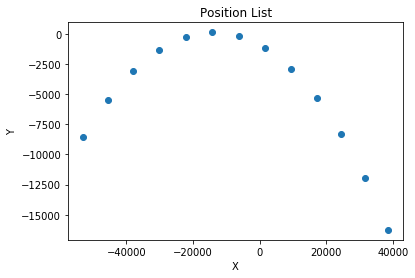

In [84]:
pl.visualize(xy=True)

In [40]:
print (pl)

(-52886.0,-8548.0)
(-45596.4,-5519.3)
(-37966.700000000004,-3086.0)
(-30173.9,-1331.5)
(-22257.3,-267.0)
(-14282.4,119.10000000000001)
(-6302.3,-187.8)
(1623.0,-1212.1000000000001)
(9456.800000000001,-2912.7000000000003)
(17101.4,-5299.1)
(24521.8,-8341.4)
(31696.0,-11983.300000000001)
(38430.200000000004,-16262.0)



In [41]:
pl.save('5degree_rotations', '.')

In [2]:
pl = pos.load('5degree_rotations', '.')

In [ ]:
center_dist = []
import numpy as np
for i, sp_i in enumerate(pl):
    for j, sp_j in enumerate(pl):
        if i == j:
            continue
        dist = sp_j.dist(sp_i)
        angle_to_center = (180 - np.abs(i-j)) / 2
        distance_to_center = dist / (2*np.cos(np.deg2rad(angle_to_center)))
        center_dist.append(distance_to_center)
        print (distance_to_center)
        # get the rotation angle between the two points 
        rot_angle = np.arcsin((sp_j.y - sp_i.y) / dist)
        print ('rot:', np.rad2deg(rot_angle))
        # we know that the center is at the angle 82.5 degrees from our base points 
        # but, we need to convert that into the angle that aligns with the 
        # XY stage 
        theta = np.deg2rad(angle_to_center) + rot_angle

        # Use the formula x_center = x_current - (magnitude * cos (angle))
        # to calculate the XY poitns of the center of rotation 
#         print ('X:', sp_j.x)
        x_center = sp_i.x - (distance_to_center * np.cos(theta))
        x_center_p = sp_i.x + (distance_to_center * np.cos(theta))
        y_center = sp_i.y - (distance_to_center * np.sin(theta))
        print (x_center, y_center)
        print (x_center_p)

In [63]:
x = [sp.x for sp in pl]
y = [sp.y for sp in pl]

In [6]:
import circle_fit
xc,yc,r,_ = cf.least_squares_circle((np.row_stack([x, y])))

ModuleNotFoundError: No module named 'circle_fit'

In [90]:
np.row_stack([x, y])

array([[-52886. , -45596.4, -37966.7, -30173.9, -22257.3, -14282.4,
         -6302.3,   1623. ,   9456.8,  17101.4,  24521.8,  31696. ,
         38430.2],
       [ -8548. ,  -5519.3,  -3086. ,  -1331.5,   -267. ,    119.1,
          -187.8,  -1212.1,  -2912.7,  -5299.1,  -8341.4, -11983.3,
        -16262. ]])

In [77]:
xc_3

-13931.100822259548

In [78]:
yc_3

-91791.47277656759

In [79]:
R_m

454112.2478890167

In [80]:
R_3

91905.45313367227

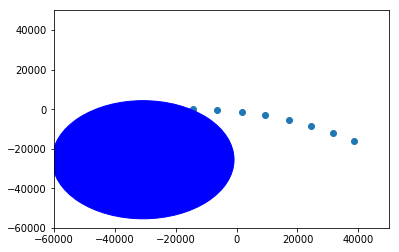

In [8]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((-30717, -25557), 29883, color='blue')
plt.ylim(-60000, 50000)
plt.xlim(-60000, 50000)
plt.scatter([sp.x for sp in pl], [sp.y for sp in pl])

# fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# # (or if you have an existing figure)
fig = plt.gcf()
ax = fig.gca()

ax.add_artist(circle1)